In [3]:
# import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [4]:
# original data
d = pd.read_csv("./asos_5yrs.csv")
d.head()

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,...,mslp,p01m,vsby,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,OLU,2016-01-01 00:35,-97.3426,41.4480,438.39,24.80,10.40,53.75,16.00,8.05,...,NaN,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
1,OMA,2016-01-01 00:52,-95.8992,41.3103,295.67,21.92,12.92,67.82,21.92,0.00,...,1030.5,0.0,10.0,NaN,BKN,NaN,NaN,3400.0,NaN,NaN
2,VTN,2016-01-01 00:52,-100.5489,42.8567,789.24,21.02,15.08,77.45,8.03,13.80,...,1033.4,0.0,10.0,NaN,OVC,NaN,NaN,5000.0,NaN,NaN
3,AIA,2016-01-01 00:53,-102.8000,42.0572,1195.58,10.04,6.08,83.64,-3.79,10.35,...,1036.3,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
4,CDR,2016-01-01 00:53,-103.0954,42.8376,999.03,21.02,12.92,70.46,8.59,12.65,...,1035.4,0.0,10.0,NaN,BKN,NaN,NaN,5000.0,NaN,NaN


In [5]:
# filter by march, april, may 2022
#d_filtered = d[d['valid'].str.contains(r'2022-03|2022-04|2022-05')]
d_filtered = d
d_filtered

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,...,mslp,p01m,vsby,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,OLU,2016-01-01 00:35,-97.3426,41.4480,438.39,24.80,10.40,53.75,16.00,8.05,...,NaN,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
1,OMA,2016-01-01 00:52,-95.8992,41.3103,295.67,21.92,12.92,67.82,21.92,0.00,...,1030.5,0.0,10.0,NaN,BKN,NaN,NaN,3400.0,NaN,NaN
2,VTN,2016-01-01 00:52,-100.5489,42.8567,789.24,21.02,15.08,77.45,8.03,13.80,...,1033.4,0.0,10.0,NaN,OVC,NaN,NaN,5000.0,NaN,NaN
3,AIA,2016-01-01 00:53,-102.8000,42.0572,1195.58,10.04,6.08,83.64,-3.79,10.35,...,1036.3,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
4,CDR,2016-01-01 00:53,-103.0954,42.8376,999.03,21.02,12.92,70.46,8.59,12.65,...,1035.4,0.0,10.0,NaN,BKN,NaN,NaN,5000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454558,AHQ,2022-11-29 23:55,-96.5946,41.2406,370.22,22.10,14.00,70.58,10.55,11.50,...,NaN,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
2454559,AFK,2022-11-29 23:55,-95.8657,40.6069,351.56,23.50,14.70,68.62,10.68,14.95,...,NaN,0.0,10.0,23.0,SCT,BKN,NaN,7500.0,9000.0,NaN
2454560,OFK,2022-11-29 23:56,-97.4351,41.9855,467.52,21.90,10.90,62.07,8.63,14.95,...,1015.2,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN
2454561,OLU,2022-11-29 23:56,-97.3426,41.4480,438.39,19.90,14.00,77.48,6.60,13.80,...,1017.1,0.0,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN


In [6]:
d_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454563 entries, 0 to 2454562
Data columns (total 21 columns):
 #   Column     Dtype  
---  ------     -----  
 0   station    object 
 1   valid      object 
 2   lon        float64
 3   lat        float64
 4   elevation  float64
 5   tmpf       float64
 6   dwpf       float64
 7   relh       float64
 8   feel       float64
 9   sped       float64
 10  alti       float64
 11  mslp       float64
 12  p01m       float64
 13  vsby       float64
 14  gust_mph   float64
 15  skyc1      object 
 16  skyc2      object 
 17  skyc3      object 
 18  skyl1      float64
 19  skyl2      float64
 20  skyl3      float64
dtypes: float64(16), object(5)
memory usage: 393.3+ MB


In [7]:
# column types to numerics
d_filtered['tmpf'] = pd.to_numeric(d_filtered['tmpf'], errors='coerce')
d_filtered['dwpf'] = pd.to_numeric(d_filtered['dwpf'], errors='coerce')
d_filtered['relh'] = pd.to_numeric(d_filtered['relh'], errors='coerce')
d_filtered['feel'] = pd.to_numeric(d_filtered['feel'], errors='coerce')
d_filtered['sped'] = pd.to_numeric(d_filtered['sped'], errors='coerce')
d_filtered['alti'] = pd.to_numeric(d_filtered['alti'], errors='coerce')
d_filtered['mslp'] = pd.to_numeric(d_filtered['mslp'], errors='coerce')
d_filtered['p01m'] = pd.to_numeric(d_filtered['p01m'], errors='coerce')
d_filtered['vsby'] = pd.to_numeric(d_filtered['vsby'], errors='coerce')
d_filtered.dtypes

station       object
valid         object
lon          float64
lat          float64
elevation    float64
tmpf         float64
dwpf         float64
relh         float64
feel         float64
sped         float64
alti         float64
mslp         float64
p01m         float64
vsby         float64
gust_mph     float64
skyc1         object
skyc2         object
skyc3         object
skyl1        float64
skyl2        float64
skyl3        float64
dtype: object

In [8]:
lengths = d_filtered["valid"].str.len()
lengths.value_counts()

16    2454563
Name: valid, dtype: int64

In [9]:
# sperating valid(YYYY-MM-DD) to Year, month, day columns
d_filtered['valid']= pd.to_datetime(d_filtered["valid"])
#Creating a column of year
d_filtered['year'] = d_filtered.valid.dt.year

#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 
d_filtered['month'] = d_filtered.valid.dt.month

d_filtered['day'] = d_filtered.valid.dt.day

d_filtered.head()

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,...,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,year,month,day
0,OLU,2016-01-01 00:35:00,-97.3426,41.4480,438.39,24.80,10.40,53.75,16.00,8.05,...,NaN,CLR,NaN,NaN,NaN,NaN,NaN,2016,1,1
1,OMA,2016-01-01 00:52:00,-95.8992,41.3103,295.67,21.92,12.92,67.82,21.92,0.00,...,NaN,BKN,NaN,NaN,3400.0,NaN,NaN,2016,1,1
2,VTN,2016-01-01 00:52:00,-100.5489,42.8567,789.24,21.02,15.08,77.45,8.03,13.80,...,NaN,OVC,NaN,NaN,5000.0,NaN,NaN,2016,1,1
3,AIA,2016-01-01 00:53:00,-102.8000,42.0572,1195.58,10.04,6.08,83.64,-3.79,10.35,...,NaN,CLR,NaN,NaN,NaN,NaN,NaN,2016,1,1
4,CDR,2016-01-01 00:53:00,-103.0954,42.8376,999.03,21.02,12.92,70.46,8.59,12.65,...,NaN,BKN,NaN,NaN,5000.0,NaN,NaN,2016,1,1


In [10]:
# treating cartegorical values
s = (d_filtered.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['station', 'skyc1', 'skyc2', 'skyc3']


In [11]:
# treating cartegorical values
for i in object_cols:
    print(i, d_filtered[i].isnull().sum())

station 0
skyc1 15946
skyc2 2160953
skyc3 2353481


In [12]:
for i in object_cols:
    d_filtered[i].fillna(d_filtered[i].mode()[0], inplace=True)

In [13]:
# treating numerical values
t = (d_filtered.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['lon', 'lat', 'elevation', 'tmpf', 'dwpf', 'relh', 'feel', 'sped', 'alti', 'mslp', 'p01m', 'vsby', 'gust_mph', 'skyl1', 'skyl2', 'skyl3']


In [14]:
# treating numerical values
for i in num_cols:
    print(i, d_filtered[i].isnull().sum())

lon 0
lat 0
elevation 0
tmpf 7450
dwpf 9317
relh 11141
feel 15014
sped 15690
alti 2684
mslp 1213846
p01m 61865
vsby 8794
gust_mph 1974901
skyl1 1504008
skyl2 2160954
skyl3 2353482


In [15]:
# treating numerical values
for i in num_cols:
    d_filtered[i].fillna(d_filtered[i].median(), inplace=True)
    
d_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454563 entries, 0 to 2454562
Data columns (total 24 columns):
 #   Column     Dtype         
---  ------     -----         
 0   station    object        
 1   valid      datetime64[ns]
 2   lon        float64       
 3   lat        float64       
 4   elevation  float64       
 5   tmpf       float64       
 6   dwpf       float64       
 7   relh       float64       
 8   feel       float64       
 9   sped       float64       
 10  alti       float64       
 11  mslp       float64       
 12  p01m       float64       
 13  vsby       float64       
 14  gust_mph   float64       
 15  skyc1      object        
 16  skyc2      object        
 17  skyc3      object        
 18  skyl1      float64       
 19  skyl2      float64       
 20  skyl3      float64       
 21  year       int64         
 22  month      int64         
 23  day        int64         
dtypes: datetime64[ns](1), float64(16), int64(3), object(4)
memory usage: 449.4+ 

In [16]:
# remove valid column - we dont need anymore
d_wo_valid = d_filtered.drop(columns="valid")
d_wo_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454563 entries, 0 to 2454562
Data columns (total 23 columns):
 #   Column     Dtype  
---  ------     -----  
 0   station    object 
 1   lon        float64
 2   lat        float64
 3   elevation  float64
 4   tmpf       float64
 5   dwpf       float64
 6   relh       float64
 7   feel       float64
 8   sped       float64
 9   alti       float64
 10  mslp       float64
 11  p01m       float64
 12  vsby       float64
 13  gust_mph   float64
 14  skyc1      object 
 15  skyc2      object 
 16  skyc3      object 
 17  skyl1      float64
 18  skyl2      float64
 19  skyl3      float64
 20  year       int64  
 21  month      int64  
 22  day        int64  
dtypes: float64(16), int64(3), object(4)
memory usage: 430.7+ MB


In [17]:
for i in d_wo_valid.columns:
    print(i)

station
lon
lat
elevation
tmpf
dwpf
relh
feel
sped
alti
mslp
p01m
vsby
gust_mph
skyc1
skyc2
skyc3
skyl1
skyl2
skyl3
year
month
day


In [18]:
# encoding categorical values to indexing. ex) station AAA to 1 or skylevel clear to 1
label_encoder = LabelEncoder()
for i in object_cols:
    d_wo_valid[i] = label_encoder.fit_transform(d_wo_valid[i])
    
d_wo_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454563 entries, 0 to 2454562
Data columns (total 23 columns):
 #   Column     Dtype  
---  ------     -----  
 0   station    int32  
 1   lon        float64
 2   lat        float64
 3   elevation  float64
 4   tmpf       float64
 5   dwpf       float64
 6   relh       float64
 7   feel       float64
 8   sped       float64
 9   alti       float64
 10  mslp       float64
 11  p01m       float64
 12  vsby       float64
 13  gust_mph   float64
 14  skyc1      int32  
 15  skyc2      int32  
 16  skyc3      int32  
 17  skyl1      float64
 18  skyl2      float64
 19  skyl3      float64
 20  year       int64  
 21  month      int64  
 22  day        int64  
dtypes: float64(16), int32(4), int64(3)
memory usage: 393.3 MB


In [19]:
d_wo_valid

,station,lon,lat,elevation,tmpf,dwpf,relh,feel,sped,alti,...,gust_mph,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,year,month,day
0,36,-97.3426,41.4480,438.39,24.80,10.40,53.75,16.00,8.05,30.36,...,25.3,1,3,3,3400.0,5500.0,7000.0,2016,1,1
1,37,-95.8992,41.3103,295.67,21.92,12.92,67.82,21.92,0.00,30.38,...,25.3,0,3,3,3400.0,5500.0,7000.0,2016,1,1
2,43,-100.5489,42.8567,789.24,21.02,15.08,77.45,8.03,13.80,30.36,...,25.3,3,3,3,5000.0,5500.0,7000.0,2016,1,1
3,5,-102.8000,42.0572,1195.58,10.04,6.08,83.64,-3.79,10.35,30.37,...,25.3,1,3,3,3400.0,5500.0,7000.0,2016,1,1
4,13,-103.0954,42.8376,999.03,21.02,12.92,70.46,8.59,12.65,30.40,...,25.3,0,3,3,5000.0,5500.0,7000.0,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454558,4,-96.5946,41.2406,370.22,22.10,14.00,70.58,10.55,11.50,29.95,...,25.3,1,3,3,3400.0,5500.0,7000.0,2022,11,29
2454559,3,-95.8657,40.6069,351.56,23.50,14.70,68.62,10.68,14.95,29.94,...,23.0,4,0,3,7500.0,9000.0,7000.0,2022,11,29
2454560,34,-97.4351,41.9855,467.52,21.90,10.90,62.07,8.63,14.95,29.92,...,25.3,1,3,3,3400.0,5500.0,7000.0,2022,11,29
2454561,36,-97.3426,41.4480,438.39,19.90,14.00,77.48,6.60,13.80,29.97,...,25.3,1,3,3,3400.0,5500.0,7000.0,2022,11,29


In [34]:
# finding most frequent values. ex) if we have 15hours of clear sky, that day is clear.
def countmax(series):
      return (series, series.value_counts())

In [67]:
# finding most frequent values. ex) if we have 15hours of clear sky, that day is clear.
import statistics
from statistics import mode
def countmax(series):
      return (mode(series))

In [68]:
test = d_wo_valid.groupby(['station', 'year', 'month', 'day']).agg({'skyc1':countmax, 'skyc2':countmax, 'skyc3':countmax})

In [69]:
test

skyc1  skyc2  skyc3
station year month day                     
0       2016 5     22       1      3      3
             6     28       1      3      3
                   29       1      3      3
        2018 7     18       1      3      3
                   19       1      3      3
...                       ...    ...    ...
43      2022 11    25       1      3      3
                   26       1      3      3
                   27       1      3      3
                   28       1      3      3
                   29       1      3      3

[103676 rows x 3 columns]

In [70]:
# Prepairing attributes of scale data
# Group by 'station', 'year', 'month', 'day' and mean of every variable. precipitation is sum for the day

    
grouped = d_wo_valid.groupby(['station', 'year', 'month', 'day']).agg({'lon':'mean', 'lat':'mean', 'elevation':'mean', 'tmpf':'mean',
                                                               'dwpf':'mean', 'relh':'mean', 'feel':'mean',
                                                               'alti':'mean', 'mslp':'mean', 'p01m':'sum',
                                                               'vsby':'mean', 'skyc1':countmax, 'skyc2':countmax,
                                                               'skyc3':countmax, 'skyl1':'mean', 'skyl2':'mean',
                                                               'skyl3':'mean'}).reset_index()
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103676 entries, 0 to 103675
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   station    103676 non-null  int64  
 1   year       103676 non-null  int64  
 2   month      103676 non-null  int64  
 3   day        103676 non-null  int64  
 4   lon        103676 non-null  float64
 5   lat        103676 non-null  float64
 6   elevation  103676 non-null  float64
 7   tmpf       103676 non-null  float64
 8   dwpf       103676 non-null  float64
 9   relh       103676 non-null  float64
 10  feel       103676 non-null  float64
 11  alti       103676 non-null  float64
 12  mslp       103676 non-null  float64
 13  p01m       103676 non-null  float64
 14  vsby       103676 non-null  float64
 15  skyc1      103676 non-null  int64  
 16  skyc2      103676 non-null  int64  
 17  skyc3      103676 non-null  int64  
 18  skyl1      103676 non-null  float64
 19  skyl2      103676 non-n

In [71]:
grouped

,station,year,month,day,lon,lat,elevation,tmpf,dwpf,relh,...,alti,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3
0,0,2016,5,22,-103.9950,41.5117,1602.91,63.680000,39.740000,41.290000,...,29.900000,1007.600000,0.00,10.000000,1,3,3,3400.000000,5500.000000,7000.000000
1,0,2016,6,28,-103.9950,41.5117,1602.91,83.750000,49.790000,31.098333,...,30.225000,1017.133333,2.29,10.000000,1,3,3,5600.000000,7083.333333,9333.333333
2,0,2016,6,29,-103.9950,41.5117,1602.91,55.940000,50.105000,81.519167,...,30.278333,1019.775000,0.00,10.000000,1,3,3,8533.333333,9083.333333,7000.000000
3,0,2018,7,18,-103.9950,41.5117,1602.91,80.080000,50.920000,38.484000,...,30.156000,1014.770000,0.00,10.000000,1,3,3,4220.000000,5500.000000,7000.000000
4,0,2018,7,19,-103.9950,41.5117,1602.91,72.394737,46.157895,42.858421,...,30.136842,1013.800000,0.00,10.000000,1,3,3,3400.000000,5500.000000,7000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103671,43,2022,11,25,-100.5489,42.8567,789.24,34.608333,17.850000,57.145417,...,30.245417,1026.708333,0.00,10.000000,1,3,3,3400.000000,5500.000000,7000.000000
103672,43,2022,11,26,-100.5489,42.8567,789.24,41.350000,22.158333,46.966667,...,29.862500,1012.500000,0.00,10.000000,1,3,3,3400.000000,5500.000000,7000.000000
103673,43,2022,11,27,-100.5489,42.8567,789.24,31.379167,19.550000,65.409167,...,29.904167,1014.708333,0.00,10.000000,1,3,3,3595.833333,5500.000000,7000.000000
103674,43,2022,11,28,-100.5489,42.8567,789.24,35.754167,19.016667,51.426667,...,29.613333,1004.662500,0.00,9.833333,1,3,3,4120.833333,5500.000000,7000.000000


In [75]:
# copy precipitation to precipitation tmrw column
# if precipitation is above 1mm = 1 ifelse less than 1mm = 0
grouped["p01m_tmrw"] = np.where(grouped["p01m"] >= 1, 1, 0)
grouped["p01m_today"] = np.where(grouped["p01m"] >= 1, 1, 0)

# saved on 11/21/2022 18:30
grouped
#grouped.to_csv("data_out.csv")
#grouped.to_csv("data_out_all_date.csv")
#grouped.to_csv("data_out_all_date_new.csv")

,station,year,month,day,lon,lat,elevation,tmpf,dwpf,relh,...,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,p01m_tmrw,p01m_today
0,0,2016,5,22,-103.9950,41.5117,1602.91,63.680000,39.740000,41.290000,...,0.00,10.000000,1,3,3,3400.000000,5500.000000,7000.000000,0,0
1,0,2016,6,28,-103.9950,41.5117,1602.91,83.750000,49.790000,31.098333,...,2.29,10.000000,1,3,3,5600.000000,7083.333333,9333.333333,1,1
2,0,2016,6,29,-103.9950,41.5117,1602.91,55.940000,50.105000,81.519167,...,0.00,10.000000,1,3,3,8533.333333,9083.333333,7000.000000,0,0
3,0,2018,7,18,-103.9950,41.5117,1602.91,80.080000,50.920000,38.484000,...,0.00,10.000000,1,3,3,4220.000000,5500.000000,7000.000000,0,0
4,0,2018,7,19,-103.9950,41.5117,1602.91,72.394737,46.157895,42.858421,...,0.00,10.000000,1,3,3,3400.000000,5500.000000,7000.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103671,43,2022,11,25,-100.5489,42.8567,789.24,34.608333,17.850000,57.145417,...,0.00,10.000000,1,3,3,3400.000000,5500.000000,7000.000000,0,0
103672,43,2022,11,26,-100.5489,42.8567,789.24,41.350000,22.158333,46.966667,...,0.00,10.000000,1,3,3,3400.000000,5500.000000,7000.000000,0,0
103673,43,2022,11,27,-100.5489,42.8567,789.24,31.379167,19.550000,65.409167,...,0.00,10.000000,1,3,3,3595.833333,5500.000000,7000.000000,0,0
103674,43,2022,11,28,-100.5489,42.8567,789.24,35.754167,19.016667,51.426667,...,0.00,9.833333,1,3,3,4120.833333,5500.000000,7000.000000,0,0


In [114]:
# precipitation tmrw column has been treated
# second day pushed to first day
# last date May 31 deleted because every row pushed one up
# Load treated csv file

#data_for_ann = pd.read_csv("./data_out.csv")
data_for_ann = pd.read_csv("./data_out_all_date_new.csv")

In [115]:
# treating cartegorical values
s = (data_for_ann.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [116]:
# treating cartegorical values
for i in object_cols:
    print(i, data_for_ann[i].isnull().sum())

for i in object_cols:
    data_for_ann[i].fillna(data_for_ann[i].mode()[0], inplace=True)

In [117]:
# treating numerical values
t = (data_for_ann.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['lon', 'lat', 'elevation', 'tmpf', 'dwpf', 'relh', 'feel', 'alti', 'mslp', 'p01m', 'vsby', 'skyl1', 'skyl2', 'skyl3', 'p01m_tmrw']


In [118]:
# treating numerical values
for i in num_cols:
    print(i, data_for_ann[i].isnull().sum())

lon 0
lat 0
elevation 0
tmpf 0
dwpf 0
relh 0
feel 0
alti 0
mslp 0
p01m 0
vsby 0
skyl1 0
skyl2 0
skyl3 0
p01m_tmrw 1


In [119]:
# treating numerical values
for i in num_cols:
    data_for_ann[i].fillna(data_for_ann[i].median(), inplace=True)
    
data_for_ann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50174 entries, 0 to 50173
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          50174 non-null  int64  
 1   station     50174 non-null  int64  
 2   year        50174 non-null  int64  
 3   month       50174 non-null  int64  
 4   day         50174 non-null  int64  
 5   lon         50174 non-null  float64
 6   lat         50174 non-null  float64
 7   elevation   50174 non-null  float64
 8   tmpf        50174 non-null  float64
 9   dwpf        50174 non-null  float64
 10  relh        50174 non-null  float64
 11  feel        50174 non-null  float64
 12  alti        50174 non-null  float64
 13  mslp        50174 non-null  float64
 14  p01m        50174 non-null  float64
 15  vsby        50174 non-null  float64
 16  skyc1       50174 non-null  int64  
 17  skyc2       50174 non-null  int64  
 18  skyc3       50174 non-null  int64  
 19  skyl1       50174 non-nul

In [120]:
data_for_ann['p01m_tmrw'].value_counts()

0.0    34741
1.0    15433
Name: p01m_tmrw, dtype: int64

In [157]:
features = data_for_ann.drop(['id', 'station', 'lon', 'lat', 'p01m_tmrw','year', 'day', 'month'], axis=1) # dropping target and extra columns       
target = data_for_ann['p01m_tmrw']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
elevation,50174.0,5.891214e-17,1.00001,-1.043081,-0.833584,-0.251145,0.515808,3.085699
tmpf,50174.0,1.076280e-16,1.00001,-3.718892,-0.768241,0.096485,0.876883,2.298573
dwpf,50174.0,4.078533e-17,1.00001,-3.631818,-0.760702,0.036807,0.885407,1.940644
relh,50174.0,7.341359e-16,1.00001,-4.228133,-0.664085,0.061802,0.713601,2.232530
feel,50174.0,4.970712e-16,1.00001,-3.657865,-0.768599,0.157794,0.851406,2.188810
alti,50174.0,-2.678789e-14,1.00001,-7.562129,-0.623809,0.007251,0.623587,4.485674
mslp,50174.0,3.670637e-14,1.00001,-5.512694,-0.247424,0.035808,0.035808,5.963452
p01m,50174.0,-1.325523e-16,1.00001,-0.371807,-0.371807,-0.371807,-0.150349,21.524974
vsby,50174.0,5.664629e-19,1.00001,-6.704382,-0.047951,0.497252,0.527926,29.505923
skyc1,50174.0,-1.132926e-17,1.00001,-1.537143,-0.587753,-0.587753,1.311026,3.209805


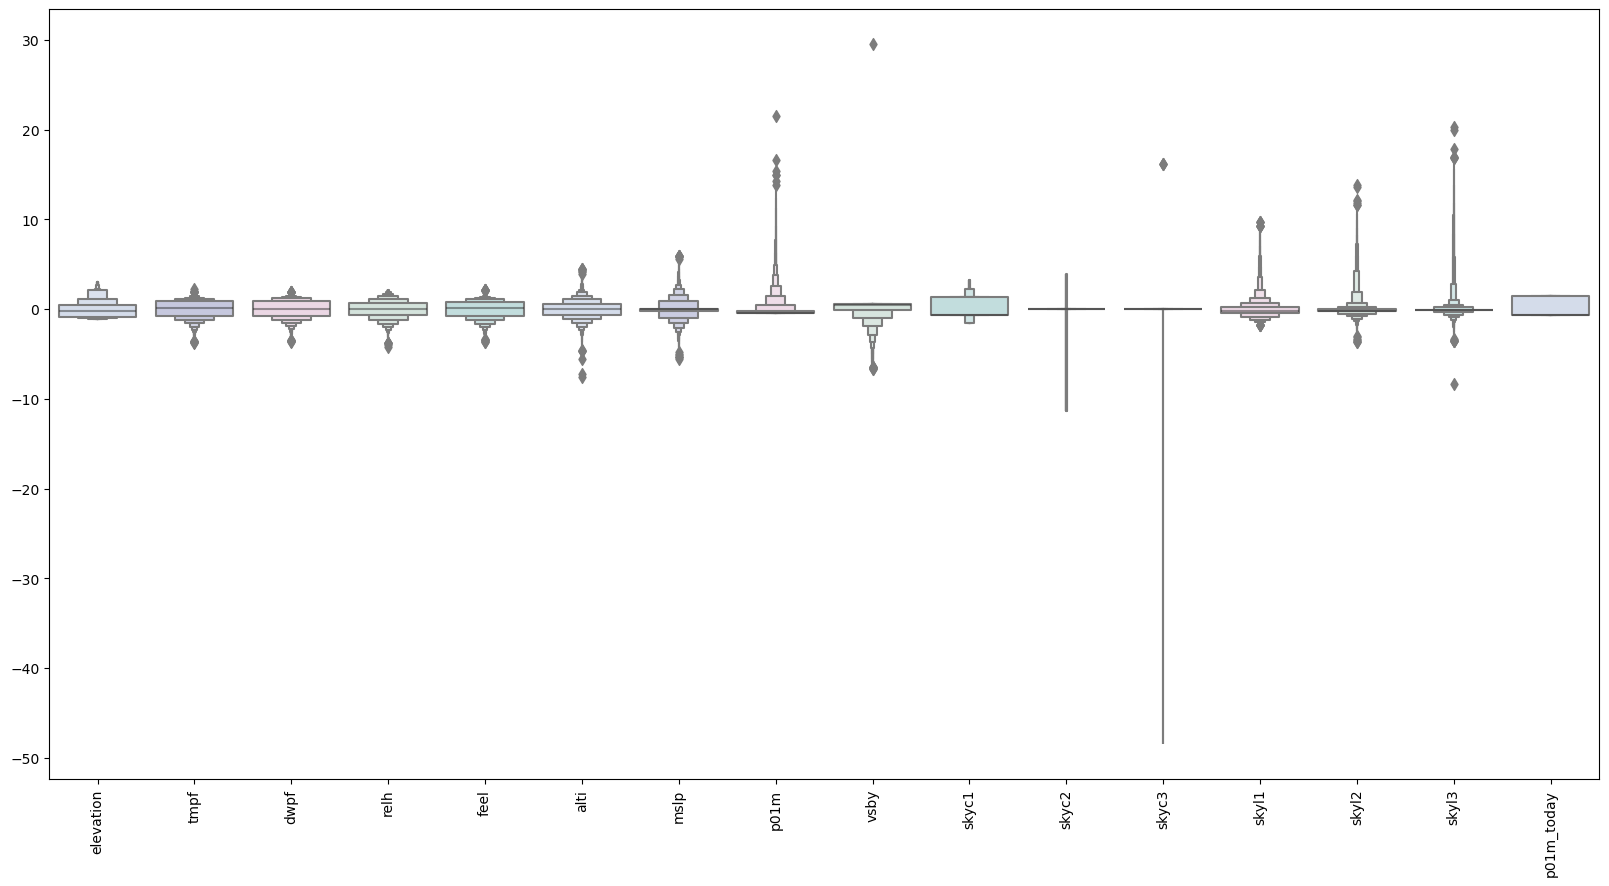

In [158]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [159]:
features

,elevation,tmpf,dwpf,relh,feel,alti,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,p01m_today
0,3.085699,1.046017,0.594477,-1.256824,0.974359,0.991705,-0.066845,-0.371807,0.527926,-0.587753,0.075917,0.019335,3.120138,0.079952,-0.123142,-0.666506
1,3.085699,0.682303,0.764669,0.084719,0.687849,1.988780,1.271390,0.231259,0.259534,-1.537143,-11.328456,0.019335,0.955719,2.492979,0.962356,1.500362
2,3.085699,0.773231,0.615194,-0.511867,0.749681,1.683768,1.005391,-0.371807,0.527926,-0.587753,0.075917,0.019335,0.298320,-0.149860,0.600523,-0.666506
3,3.085699,0.833495,0.676454,-0.612538,0.814766,1.446068,0.567056,0.073611,0.527926,-0.587753,0.075917,0.019335,1.049908,0.654483,-0.123142,1.500362
4,3.085699,0.527277,0.705413,0.599364,0.553782,1.744770,1.123779,-0.214159,-0.891026,-1.537143,0.075917,0.019335,0.488620,0.674181,0.172903,1.500362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50169,0.515808,-0.971872,-1.297911,-0.864711,-0.956042,1.303028,1.979470,-0.371807,0.527926,-0.587753,0.075917,0.019335,-0.293723,-0.166275,-0.123142,-0.666506
50170,0.515808,-0.627323,-1.067572,-1.600363,-0.610400,-0.630119,-0.575614,-0.371807,0.527926,-0.587753,0.075917,0.019335,-0.293723,-0.166275,-0.123142,-0.666506
50171,0.515808,-1.136906,-1.207023,-0.267463,-1.188800,-0.419766,-0.178489,-0.371807,0.527926,-0.587753,0.075917,0.019335,-0.203379,-0.166275,-0.123142,-0.666506
50172,0.515808,-0.913311,-1.235536,-1.278024,-1.001125,-1.888032,-1.985030,-0.371807,0.405232,-0.587753,0.075917,0.019335,0.038821,-0.166275,-0.123142,-0.666506


In [163]:
##full data for 
features["p01m_tmrw"] = target

##Dropping with outlier
features = features[(features["skyl1"]<10)&(features["skyl2"]>-8)]
features = features[(features["skyl2"]<10)&(features["skyl2"]>-8)]
features = features[(features["skyl3"]<10)&(features["skyl3"]>-8)]

features.shape

(50033, 17)

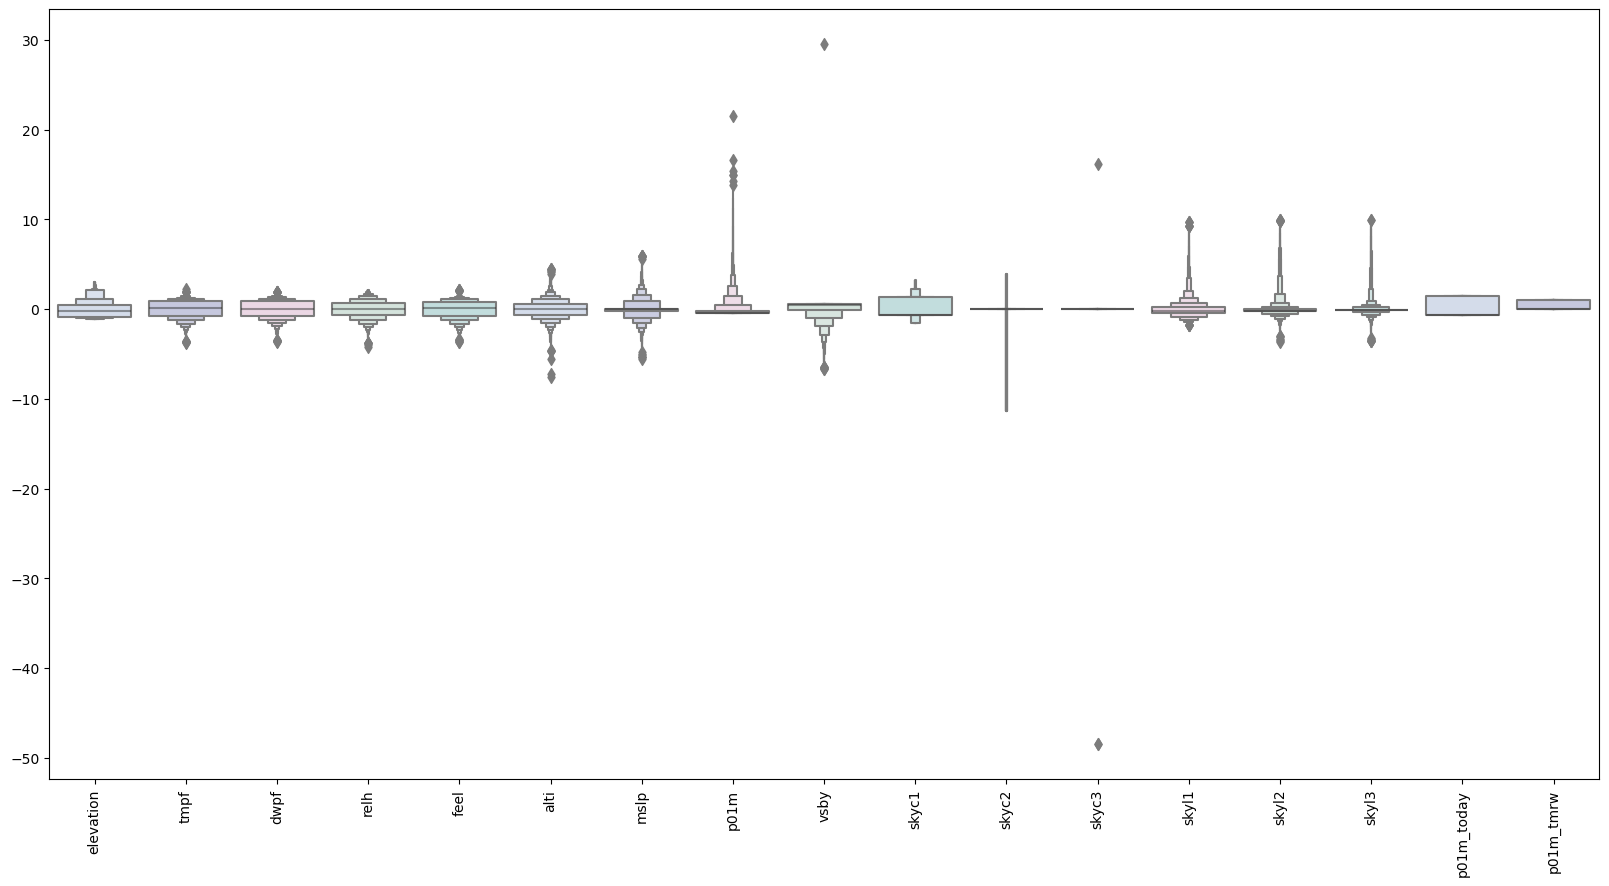

In [164]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [165]:
# prepare test and training data
X = features.drop(["p01m_tmrw"], axis=1)
y = features["p01m_tmrw"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(50033, 16)

In [178]:
# ANN
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
#model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
#model.add(Dropout(0.25))
#model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, epochs = 300, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/300


C:\Users\yooki\anaconda3\envs\py\lib\site-packages\keras\engine\data_adapter.py:1506: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1001/1001 [==============================] - 2s 2ms/step - loss: 0.6412 - accuracy: 0.6927 - val_loss: 0.5934 - val_accuracy: 0.6895
Epoch 2/300
1001/1001 [==============================] - 2s 2ms/step - loss: 0.5905 - accuracy: 0.6935 - val_loss: 0.5868 - val_accuracy: 0.6895
Epoch 3/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5857 - accuracy: 0.6935 - val_loss: 0.5832 - val_accuracy: 0.6895
Epoch 4/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5834 - accuracy: 0.6935 - val_loss: 0.5804 - val_accuracy: 0.6895
Epoch 5/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5814 - accuracy: 0.6935 - val_loss: 0.5785 - val_accuracy: 0.6895
Epoch 6/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5793 - accuracy: 0.6937 - val_loss: 0.5769 - val_accuracy: 0.6895
Epoch 7/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5775 - accuracy: 0.6949 - val_loss: 0.5754 - val_accuracy: 0.68

1001/1001 [==============================] - 1s 1ms/step - loss: 0.5611 - accuracy: 0.7136 - val_loss: 0.5597 - val_accuracy: 0.7127
Epoch 58/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5608 - accuracy: 0.7134 - val_loss: 0.5596 - val_accuracy: 0.7116
Epoch 59/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5601 - accuracy: 0.7142 - val_loss: 0.5597 - val_accuracy: 0.7126
Epoch 60/300
1001/1001 [==============================] - 2s 2ms/step - loss: 0.5605 - accuracy: 0.7150 - val_loss: 0.5593 - val_accuracy: 0.7107
Epoch 61/300
1001/1001 [==============================] - 2s 2ms/step - loss: 0.5596 - accuracy: 0.7159 - val_loss: 0.5593 - val_accuracy: 0.7105
Epoch 62/300
1001/1001 [==============================] - 2s 2ms/step - loss: 0.5590 - accuracy: 0.7131 - val_loss: 0.5590 - val_accuracy: 0.7131
Epoch 63/300
1001/1001 [==============================] - 2s 2ms/step - loss: 0.5597 - accuracy: 0.7149 - val_loss: 0.5591 - val_accuracy

1001/1001 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7187 - val_loss: 0.5544 - val_accuracy: 0.7185
Epoch 114/300
1001/1001 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7196 - val_loss: 0.5543 - val_accuracy: 0.7188
Epoch 115/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7217 - val_loss: 0.5544 - val_accuracy: 0.7188
Epoch 116/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7204 - val_loss: 0.5538 - val_accuracy: 0.7177
Epoch 117/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7185 - val_loss: 0.5541 - val_accuracy: 0.7187
Epoch 118/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.7200 - val_loss: 0.5537 - val_accuracy: 0.7187
Epoch 119/300
1001/1001 [==============================] - 1s 1ms/step - loss: 0.5516 - accuracy: 0.7197 - val_loss: 0.5538 - val_ac

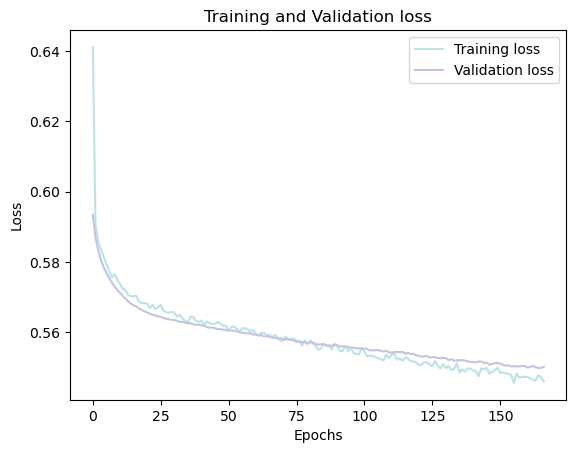

In [179]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

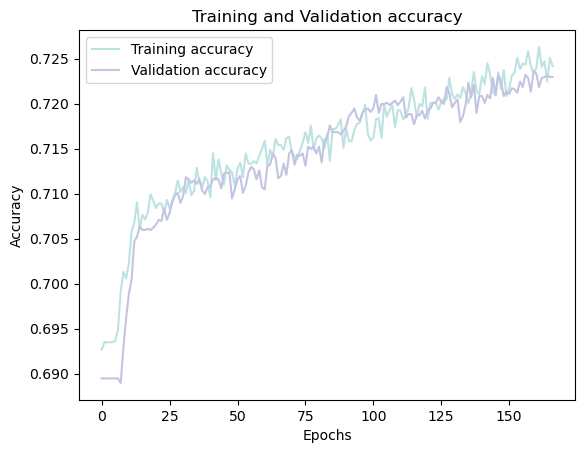

In [180]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [181]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

<AxesSubplot:>

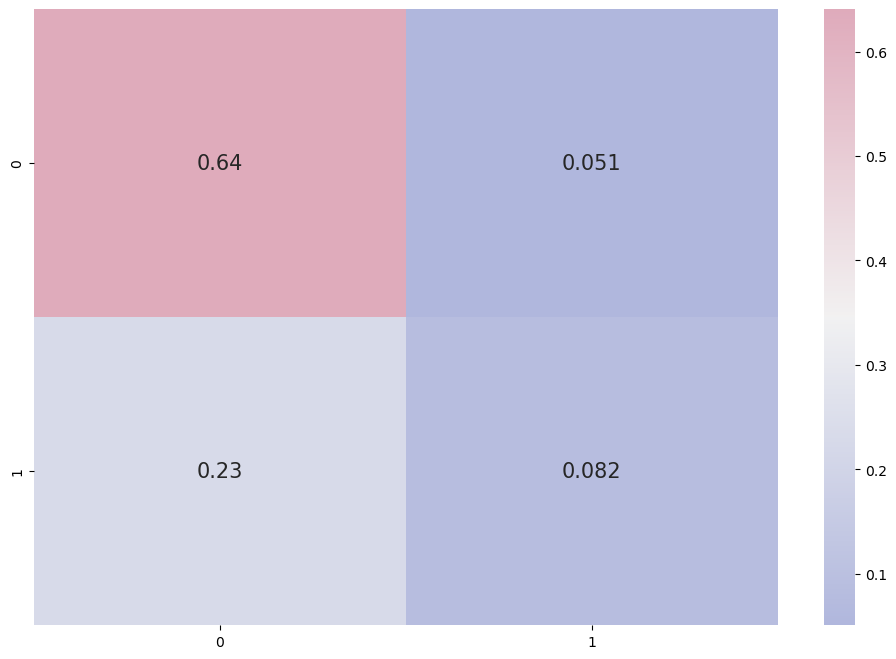

In [182]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82      6917
         1.0       0.62      0.26      0.37      3090

    accuracy                           0.72     10007
   macro avg       0.68      0.60      0.60     10007
weighted avg       0.70      0.72      0.68     10007

